---
Monte Carlo Methods II
---

## The Traveling Salesman Problem 

Goal: Find the shortest route that visits a given set of locations on a map. 
    
The definition of the problem is as follows. A travel salesman wishes to visit N cities. We'll assume that he can travel in a straight line between any pair of cities (by helicopter?). Given the coordinates of the cities, the problem is to devise the shortest tour that starts and ends at the same city and visits all N cities.

To make the problem simple, we'll consider it in a 2D space as opposed to the surface of the Earth, which is curved. The locations of the cities are initially placed at random in a square of unit length on each side. 

The cities will be numbered in order from 0 to N-1 (0 is the city visited first). `r` is an array that contains the locations of the cities. The total distance travelled is the sum over all distances in the tour -- this is the quantity we are minimizing.

Steps:
- initialize the simulation: assign random locations to the N cities
- choose an initial random tour and compute the total length of this tour
- set the temperature to be the max temperature
- run the simulated annealing:
    - compute the new temperature according to the cooling schedule
    - choose two distinct cities to swap 
    - accept or reject this swap according to the Metropolis Monte Carlo criterion
    - if the move shortens the length of the tour, the move is always accepted
    - if the move lengthens the tour, we accept it with the Metropolis probability (in this case, distance is treated like an energy) 
    - if the move is rejected, swap the cities back
- repeat the simulated annealing steps until the system has "cooled" - we now have an optimized, converged solution


# Question 1: Simulated Annealing & The Travelling Salesman Problem


A traveling salesman wishes to visit $N$ cities. We'll assume he can travel in a straight line between cities (e.g. by plane). Given the coordinates of the cities, the problem is to derive the shortest tour in terms of total distance travelled that starts at the same city and visits all $N$ cities. 

To simplify the problem, we'll consider it in a flat 2D space as opposed to the surface of the earth, which is curved. The position of city $i$ is given by the vector $\vec{r_i} = (x_i, y_i)$, with $\vec{r_N} = \vec{r_0}$ since the tour will end where it began (the cities are numbered from $0$ to $N-1$).

The total distance travelled is:

$$D = \sum_{i=0}^{N-1}|\vec{r_{i+1}} - \vec{r_i}|$$

We want to minimize this quantity over the set of all possible tours (i.e. over all possible choices of the order of the cities). To do this, we need to choose a set of moves for the Markov chain. In this case, a suitable set of moves is swaps of pairs of cities in the tour. The calculation will involve setting up an initial tour (at random) and repeatedly trying to swap a pair of cities. If a swap shortens the tour, then we always accept it and proceed to the next move. If it lengthens the tour, then we accept it with the Metropolis probability:
 
$\displaystyle P_a = 1 \quad \text{if}\ E_j \leq E_i$ (always accept a lower energy state)
 
$\displaystyle P_a = \exp\left(-\frac{E_j - E_i}{k_B T}\right) \quad \text{if}\ E_j > E_i$ (sometimes accept a higher energy state, more often for hight $T$).

[Note: the energy, $E$, is replaced by the distance, $D$.] 

If the move was rejected, then we need to swap the cities back to where they were previously before we try another move. At each step, we also need to calculate the temperature according to the cooling schedule:

$ T = T_0 e^{-t/\tau}$

You can choose the following values for the cooling:
maximum_temperature = 10
minimum_temperature = 0.001 
tau = 10000

Here are the $x,y$ coordinates of the $N=10$ cities:

 CITY 1 (0.616,  0.041)  
 CITY 2 (0.871, 0.637)  
 CITY 3 (0.353, 0.606)  
 CITY 4 (0.941, 0.610)  
 CITY 5 (0.327, 0.456)  
 CITY 6 (0.657, 0.596)  
 CITY 7 (0.103, 0.280)  
 CITY 8 (0.105, 0.712)  
 CITY 9 (0.240, 0.488)  
 CITY 10 (0.865, 0.146)  
 
(All of the cities have coordinates between $0$ and $1$.)

The output of your program should include the following:  
(1) A plot showing the total distance travelled, $D$, after each Monte Carlo move.   
(2) The shortest distance possible, as determined by the algorithm.  

[35 points]

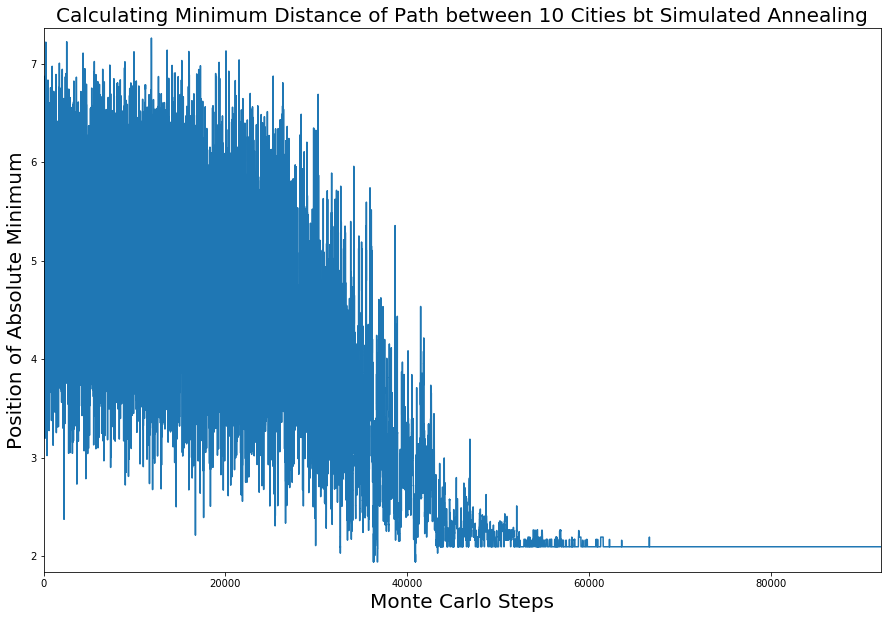

Smallest distance as determined by Simulated Annealing:  2.0975205990825825


In [54]:
# Write your program (with comments!) here
from random import random 
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as constants

def distance(n, m, path, cities):
    '''
    input: int, int, list of 2D coords
    output: float
    
    Takes in two integers representing two of the 10 cities in the list 
    of cities and calculates the distance D between them
    '''
    
    # The coordinates of cities n and m
    n_coords = cities[int(path[n])]
    m_coords = cities[int(path[m])]
    
    # Difference the x and y coords respectively between the coordinates
    # of cities n and m
    dx2 = (n_coords[0] - m_coords[0])**2
    dy2 = (n_coords[1] - m_coords[1])**2
    
    # Euclidean distance using dx2 and dy2
    distance = np.sqrt(dx2 + dy2)
    
    return distance

def temperature(t, maximum_temperature, tau):
    return maximum_temperature*np.exp(-t/tau)
    
# Storing the locations of the cities
cities = ((0.616, 0.041), (0.871, 0.637), (0.353, 0.606), (0.941, 0.610),\
              (0.327, 0.456), (0.657, 0.596), (0.103, 0.280), (0.105, 0.712), (0.240, 0.488), (0.865, 0.146))

# Constants for temperature measurement
maximum_temperature = 10 
minimum_temperature = 0.001 
tau = 10000

# Randomly choose a cyclic path of 11 cities where the 11th city is the 
# same as the first city
path = np.zeros(11)

# Store the randomly chosen path into the first 9 places in the path 
# array, ending the the array with the 0th city
path[:9] = np.random.choice([0,1,2,3,4,5,6,7,8,9], 9)
path[10] = path[0]


# Storing the distances between cities for each swap
distances = []

# To calculate the total distance, we go through each city in the path 
# and calculate the distance between it and the previous city. We start
# the calculation at the second city, i.e. city[1]
D = 0
for i in range(1,11):
    D += distance(i, i-1, path, cities)

# Append the value for D into the list of distances
distances.append(D)

# Initial time and time step
t = 0
dt = 1.0

# We calculate up until we reach a minimum temperature
while temperature(t, maximum_temperature, tau) > minimum_temperature:

    # Swap cities randomly 
    # First we pick two indices i and j to swap from the cycle, path
    i = np.random.choice([0,1,2,3,4,5,6,7,8,9,10], 1)
    j = np.random.choice([0,1,2,3,4,5,6,7,8,9,10], 1)
    
    # Store the values of the cities into temporary values
    city_i = path[int(i)]
    city_j = path[int(j)]
    
    # Temporary new path that we will calculate the probability of swapping
    new_path = np.copy(path)
    
    # Swapping them in the path
    new_path[i] = city_j
    new_path[j] = city_i
    
    # Calculate new distance, D
    new_D = 0
    for i in range(1,11):
        new_D += distance(i, i-1, new_path, cities)
    
    # Calculate acceptance probability according to:
    # exp[-(D_j - D_i)/k*T]
    # Where D_j is the new path distance, D_i is the old path distance,
    # k is the Boltzmann Constant, and T is the current temperature
    arg = -((new_D - D)/(1*temperature(t, maximum_temperature, tau)))
    P_a = np.exp(arg)
    
    # If we manage to pick a random number less than the acceptance 
    # probability, then we switch the old path to the new path, despite
    # the distance being actually longer. Otherwise, if the new path is 
    # shorter than the old path, then P_a > 1.0 and we always accept a
    # switch to the new path
    if random() < P_a:
        
        # Set our path to the new path
        path = np.copy(new_path)
        
        # Append the value for the new distance into the list of distances
        # and save new_D into D
        D = new_D
        distances.append(new_D)
        
    # If P_a < 1.0 but we did not get a random number less than P_a 
    # then we let path remain the same and append its value into the
    # list of distances
    else:
        distances.append(D)
        
    # Increase the time by dt
    t+=dt


# Define the figure and axes objects with size 15x10
fig, ax = plt.subplots(figsize=(15.0,10.0))
plt.title("Calculating Minimum Distance of Path between 10 Cities bt Simulated Annealing", fontsize=20)

# Plot the result
plt.plot(distances)

plt.xlabel("Monte Carlo Steps", fontsize=20)
plt.ylabel("Position of Absolute Minimum", fontsize=20)
plt.xlim(0.0, len(distances))
plt.ylim(min(distances)-0.1, max(distances)+0.1)
plt.show()

print("Smallest distance as determined by Simulated Annealing: ", distances[-1])

# Question 2: Finding the global minimum using simulated annealing

(a) Consider the function $f(x) = x^2 -
\cos 4\pi x$, which looks like this:


![](fig.png)

Clearly the global minimum of this function is at $x=0$.

Write a program to confirm this fact using simulated annealing
  starting at, say, $x=2$, with Monte Carlo moves of the form $x\to
  x+\delta$ where $\delta$ is a random number drawn from a Gaussian
  distribution with mean zero and standard deviation one.  
  
  Use an exponential cooling schedule and adjust the start and
  end temperatures, as well as the exponential constant, until you find
  values that give good answers in reasonable time.  Have your program make
  a plot of the values of $x$ as a function of time during the run and have
  it print out the final value of $x$ at the end.  
  
(b) Now adapt your program to find the minimum of the more complicated
  function $f(x) = \cos x + \cos \sqrt2x + \cos \sqrt3 x$ in the range
  $0<x<50$.

Hint: The correct answer for part (b) is around $x=16$, but there are also
competing minima around $x=2$ and $x=42$ that your program might find.  In
real-world situations, it is often good enough to find any reasonable
solution to a problem, not necessarily the absolute best, so the fact that
the program sometimes settles on these other solutions is not necessarily a
bad thing.

[40 points]

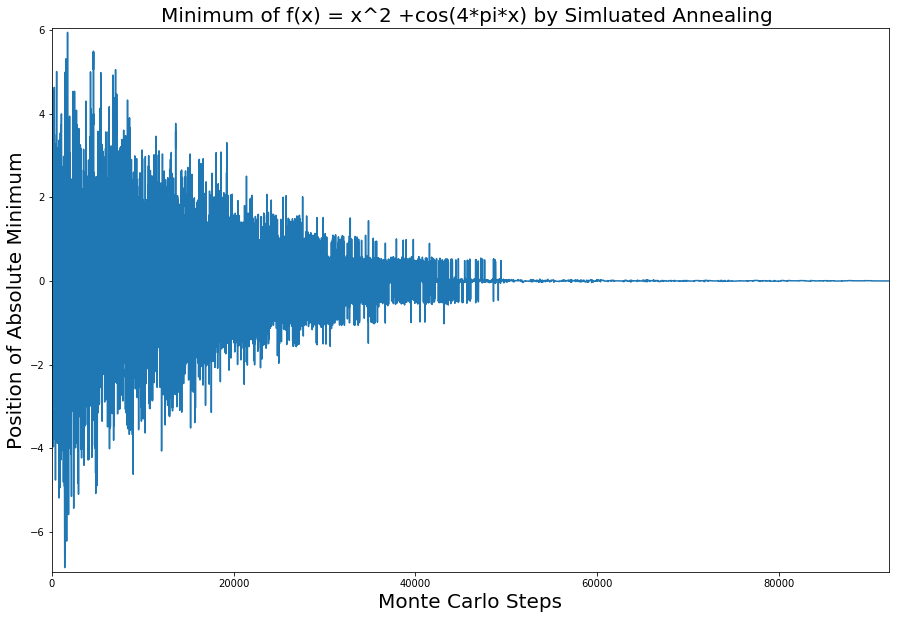

Minimum of f(x) = x^2 + cos(4*pi*x) : -0.0019478784354795527


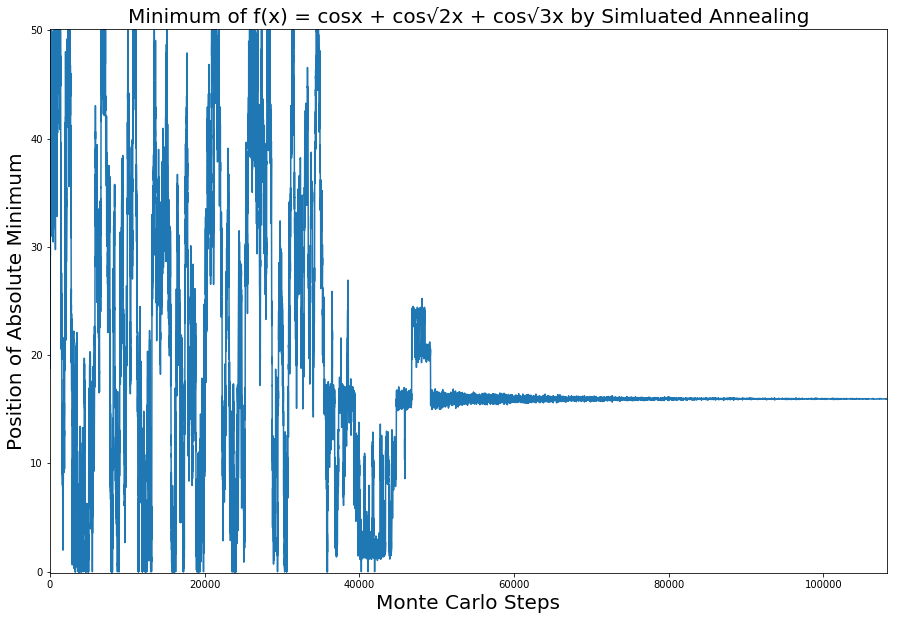

Minimum of f(x) = cosx + cos√2x + cos√3x:  15.933492944825595


In [53]:
# Write your program (with comments!) here
from random import random 
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    '''
    Returns the function  f(x)=x^2−cos4πx at the point x
    '''
        
    # Splitting function into 2 parts for ease of readability
    f_1 = x**2
    f_2 = np.cos(4.0*np.pi*x)
    
    return f_1 - f_2

def f2(x):
    '''
    Returns the function  f(x)=cosx + cos(sqrt2)x + cos(sqrt3)x at the point x
    '''
        
    # Splitting function into 3 parts for ease of readability
    f_1 = np.cos(x)
    f_2 = np.cos(np.sqrt(2)*x)
    f_3 = np.cos(np.sqrt(3)*x)
    
    return f_1 + f_2 + f_3

def temperature(t, maximum_temperature, tau):
    '''
    The exponential cooling schedule depending on the initial maximum
    temperature and the rate of cooling, tau.
    '''
    return maximum_temperature*np.exp(-t/tau)
    
def random_x(x):
    '''
    return a new value x + d where d is a randum number drawn from a
    gaussian distribution with mean 0 and standard deviation 1
    '''
    
    d = np.random.normal(0.0, 1.0)
    return x + d


############################################################################################
# a) Simulated Annealing for f(x) = x^2 + cos(4pix)
############################################################################################

# We want to determine the minimum via simulated annealing
# Start first with an initial minimum given x=2
f_minimum = 2.0

# We apply our cooling schedule based on the following contants:
maximum_temperature = 10 
minimum_temperature = 0.001 
tau = 10000

# We collect the minimums at each step in the list minimums
minimums = []

# We perform the simulated annealing as long as we do not reach our minimum 
# temperature. We start at t=0  and using time steps of dt=1.0
t = 0
dt = 1.0


while temperature(t, maximum_temperature, tau) > minimum_temperature:
    
    # Calculate a new minimum based on the random new value for f at x + d
    new_f_minimum = random_x(f_minimum)
    
    # Calculate the acceptance probability using the difference between the minumums and 
    # the temperature
    arg = -((f(new_f_minimum) - f(f_minimum))/(temperature(t, maximum_temperature, tau)))
    P_a = np.exp(arg)
    
    # If the random number is less than the acceptance probability, then we set the new
    # f_minimum to new_f_minimum and add the minimum to our list of minimums
    if random() < P_a:
        
        f_minimum = new_f_minimum
        minimums.append(f_minimum)
        
    # Otherwise the new minimum was not accepted and we append to the previous value
    else:
        minimums.append(f_minimum)
    
    # Increase the time step for temperature calculations
    t+=dt


# Define the figure and axes objects with size 15x10
fig, ax = plt.subplots(figsize=(15.0,10.0))
plt.title("Minimum of f(x) = x^2 +cos(4*pi*x) by Simluated Annealing ", fontsize=20)

# Plot the result
plt.plot(minimums)

plt.xlabel("Monte Carlo Steps", fontsize=20)
plt.ylabel("Position of Absolute Minimum", fontsize=20)
plt.xlim(0.0, len(minimums))
plt.ylim(min(minimums) - 0.1, max(minimums) + 0.1)
plt.show()

print("Minimum of f(x) = x^2 + cos(4*pi*x) :", minimums[-1])

############################################################################################
# b) Simulated Annealing for f(x) = cosx + cos√2x + cos√3x, 0 < x < 50
############################################################################################

# We want to determine the minimum via simulated annealing
# Start first with an initial minimum given x=49
f_minimum = 25.0

# We apply our cooling schedule based on the following contants:
maximum_temperature = 50 
minimum_temperature = 0.001 
tau = 10000

# We collect the minimums at each step in the list minimums
minimums = []

# We perform the simulated annealing as long as we do not reach our minimum 
# temperature. We start at t=0  and using time steps of dt=1.0
t = 0
dt = 1.0

while temperature(t, maximum_temperature, tau) > minimum_temperature:
    
    # Calculate a new minimum based on the random new value for f at x + d
    new_f_minimum = random_x(f_minimum)
    
    # Calculate the acceptance probability using the difference between the minumums
    arg = -((f2(new_f_minimum) - f2(f_minimum))/(temperature(t, maximum_temperature, tau)))
    P_a = np.exp(arg)
    
    # If the random number is less than the acceptance probability, then we set the new
    # f_minimum to new_f_minimum
    if random() < P_a:
        
        f_minimum = new_f_minimum
        
        # We want to ensure that our minimum point corresponds with the bounds on x:
        # 0 < x < 50
        if f_minimum < 0:
            f_minimum = 0.0
        elif f_minimum > 50:
            f_minimum = 50.0
        
        minimums.append(f_minimum)
    # If P_a < 1.0 but we did not get a random number less than P_a 
    # then we let path remain the same and append its value into the
    # list of distances
    else:
        
        # We want to ensure that our minimum point corresponds with the bounds on x:
        # 0 < x < 50
        if f_minimum < 0:
            f_minimum = 0.0
        elif f_minimum > 50:
            f_minimum = 50.0
            
        minimums.append(f_minimum)
    
    # Increase the time step for temperature calculations
    t+=dt
    


# Define the figure and axes objects with size 15x10
fig, ax = plt.subplots(figsize=(15.0,10.0))
plt.title("Minimum of f(x) = cosx + cos√2x + cos√3x by Simluated Annealing", fontsize=20)

# Plot the result
plt.plot(minimums)

plt.xlabel("Monte Carlo Steps", fontsize=20)
plt.ylabel("Position of Absolute Minimum", fontsize=20)
plt.xlim(0.0, len(minimums))
plt.ylim(min(minimums) - 0.1, max(minimums) + 0.1)
plt.show()

print("Minimum of f(x) = cosx + cos√2x + cos√3x: ", minimums[-1])


# Question 3: Reading (PHY2710 students only)

Write a short summary of the paper in the Markdown cell below (max 400 words)

- What did the authors do? (Methods)
- Why did they do it? (Background, motivation)
- What did they find? (Key results)

[25 points]

*Summary here*

# Question 3: Visualization (PHY426 students only)

Obtain the coordinates of any protein structure from the protein data bank (PDB). Use VMD to visualize the structure of the protein in a representation of your choice. Upload your result as an image file here to the Jupyterhub together with the original PDB file.

[25 points]

Neisseria gonorrhoeae transaldolase, variant K8A